# Section 11: Files

## Lesson 30: Filenames and absolute/relative paths

In [1]:
import os

In [2]:
r'This is Carol\'s cat'

"This is Carol\\'s cat"

In [4]:
r"C:\Thomas\ML"

'C:\\Thomas\\ML'

### os.path.join

In [5]:
os.path.join("c", "Thomas", "ML")

'c\\Thomas\\ML'

In [6]:
os.sep

'\\'

In [7]:
os.getcwd()

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

Relative paths
* .\: current folder
* ..\ parent folder

### os.path.abspath / isabs / relpath

In [8]:
os.path.abspath(".\\")

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

In [9]:
os.path.abspath("..\\")

'C:\\Thomas\\ML'

In [10]:
os.path.isabs("..\\")

False

In [12]:
os.path.isabs("g:\\test")

True

In [14]:
os.path.relpath(r'C:\Thomas\Ma Musique')

'..\\..\\Ma Musique'

We can also specify a specific current working directory

In [16]:
os.path.relpath(r'C:\Thomas\Ma Musique', r'c:\Thomas')

'Ma Musique'

### os.path.[dir/base]name

We can also get only the paths of the hierarchy, or just the last part of the path, using the following functions:
* os.path.dirname (part before the final slash)
* os.path.basename (part after the final slash)

In [17]:
os.path.dirname(r"C:\Thomas\Algo\Algo.ipynb")

'C:\\Thomas\\Algo'

In [19]:
os.path.basename(r"C:\Thomas\Algo\Algo.ipynb")

'Algo.ipynb'

### os.path.exists

In [21]:
os.path.exists(r"c:\Jean\jds.isdq")

False

In [22]:
os.path.exists(r"C:\Thomas\Algo\Algo.ipynb")

True

os.path.isfile

In [23]:
os.path.isfile(r"C:\Thomas\Algo\Algo.ipynb")

True

In [25]:
os.path.isfile(r"C:\Thomas\Algo")

False

### os.path.getsize

In [27]:
os.path.getsize(r"C:\Thomas\Algo\Algo.ipynb")

19053

In [28]:
os.path.getsize(r"C:\Thomas\Algo")

0

In [30]:
os.listdir(r"c:\Thomas\algo")

['.ipynb_checkpoints', 'Algo.ipynb']

In [53]:
def get_total_size(folder):
    total_size = 0
    for filename in os.listdir(folder):
#         print(os.path.abspath(filename))
        if os.path.isfile(os.path.abspath(filename)):
            print("{}: {} bytes".format(os.path.abspath(filename), 
                                        os.path.getsize(os.path.abspath(filename))) )
            total_size += os.path.getsize(os.path.abspath(filename))
    return total_size

In [54]:
get_total_size(r"C:\Thomas\Algo")

0

In [55]:
os.path.isfile(r"C:\Thomas\ML\automate-the-boring-stuff-python\Algo.ipynb")

False

Weird, isfile returns False for a ipynb...

In [56]:
get_total_size(r"C:\Thomas\ML\automate-the-boring-stuff-python")

C:\Thomas\ML\automate-the-boring-stuff-python\README.md: 217 bytes
C:\Thomas\ML\automate-the-boring-stuff-python\Section11_Files.ipynb: 10466 bytes


10683

### os.makedirs()

In [57]:
os.makedirs(r"c:\thomas\test\test1")

### RECAP

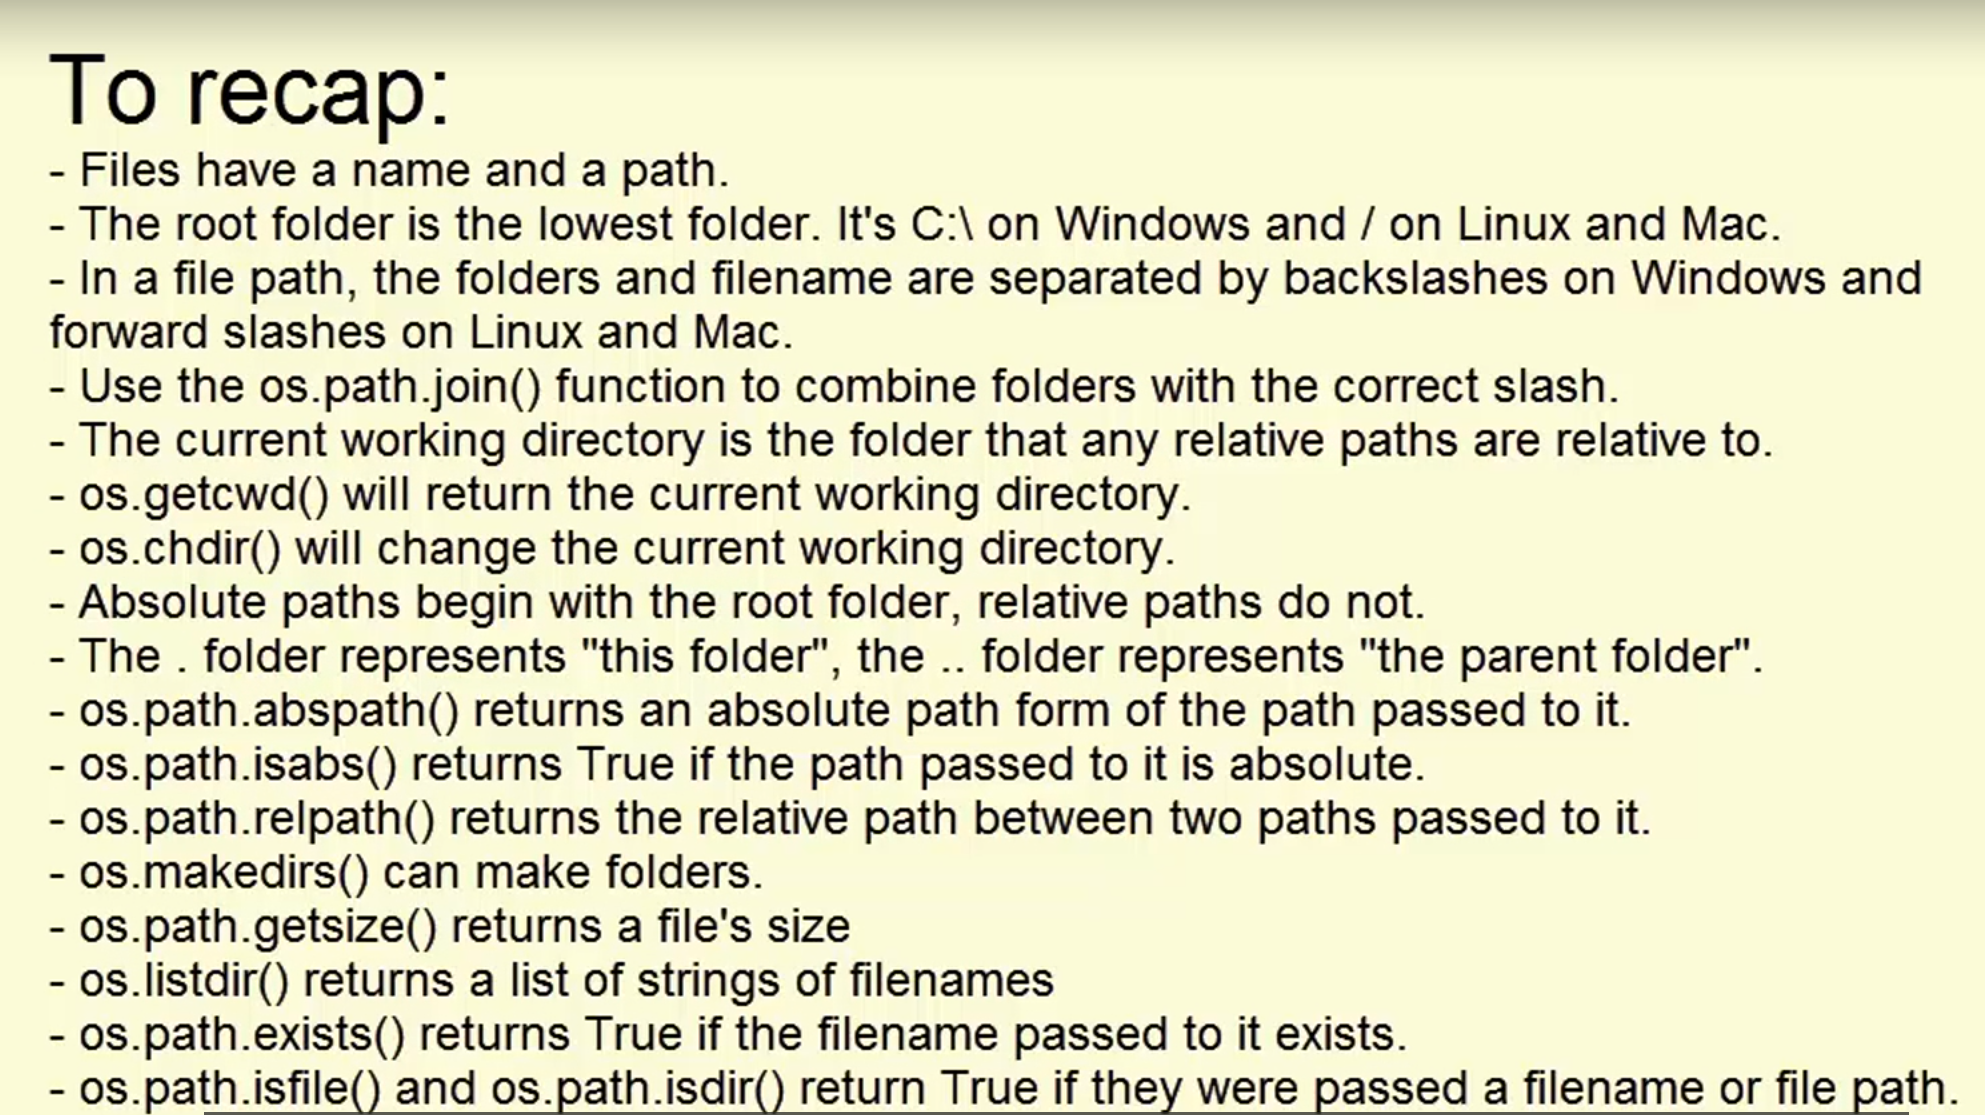

---

## Lesson 31: Reading and writing plaintext files

Binary files = all files that aren't plaintext files

### Text files

In [58]:
os.getcwd()

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

In [59]:
hello_world = open('bacon.txt', 'w')

In [60]:
hello_world.write("hello world")

11

In [61]:
hello_world.write("hello world")

11

In [62]:
hello_world.close()

In [63]:
hello_world = open('bacon.txt', 'a')

In [64]:
hello_world.write("\nBacon is delicious")

19

In [65]:
hello_world.close()

### Binary files (shelve module)

shelve is based on pickle, but also adds a dictionary layer on top of it

It adds 3 binary files, for each shelf file

Similar to dictionaries, it has keys(), and values() methods

In [66]:
import shelve

In [67]:
shelf_file = shelve.open('mydata')

In [68]:
shelf_file["cats"] = ["Loulou", "Tommy"]

In [69]:
shelf_file.close()

In [70]:
shelf_file = shelve.open("mydata")

In [71]:
shelf_file

In [72]:
shelf_file["cats"]

['Loulou', 'Tommy']

In [73]:
for key in shelf_file.keys():
    print(key, shelf_file[key])

cats ['Loulou', 'Tommy']


In [74]:
list(shelf_file.keys())

['cats']

In [75]:
list(shelf_file.values())

[['Loulou', 'Tommy']]

### RECAP

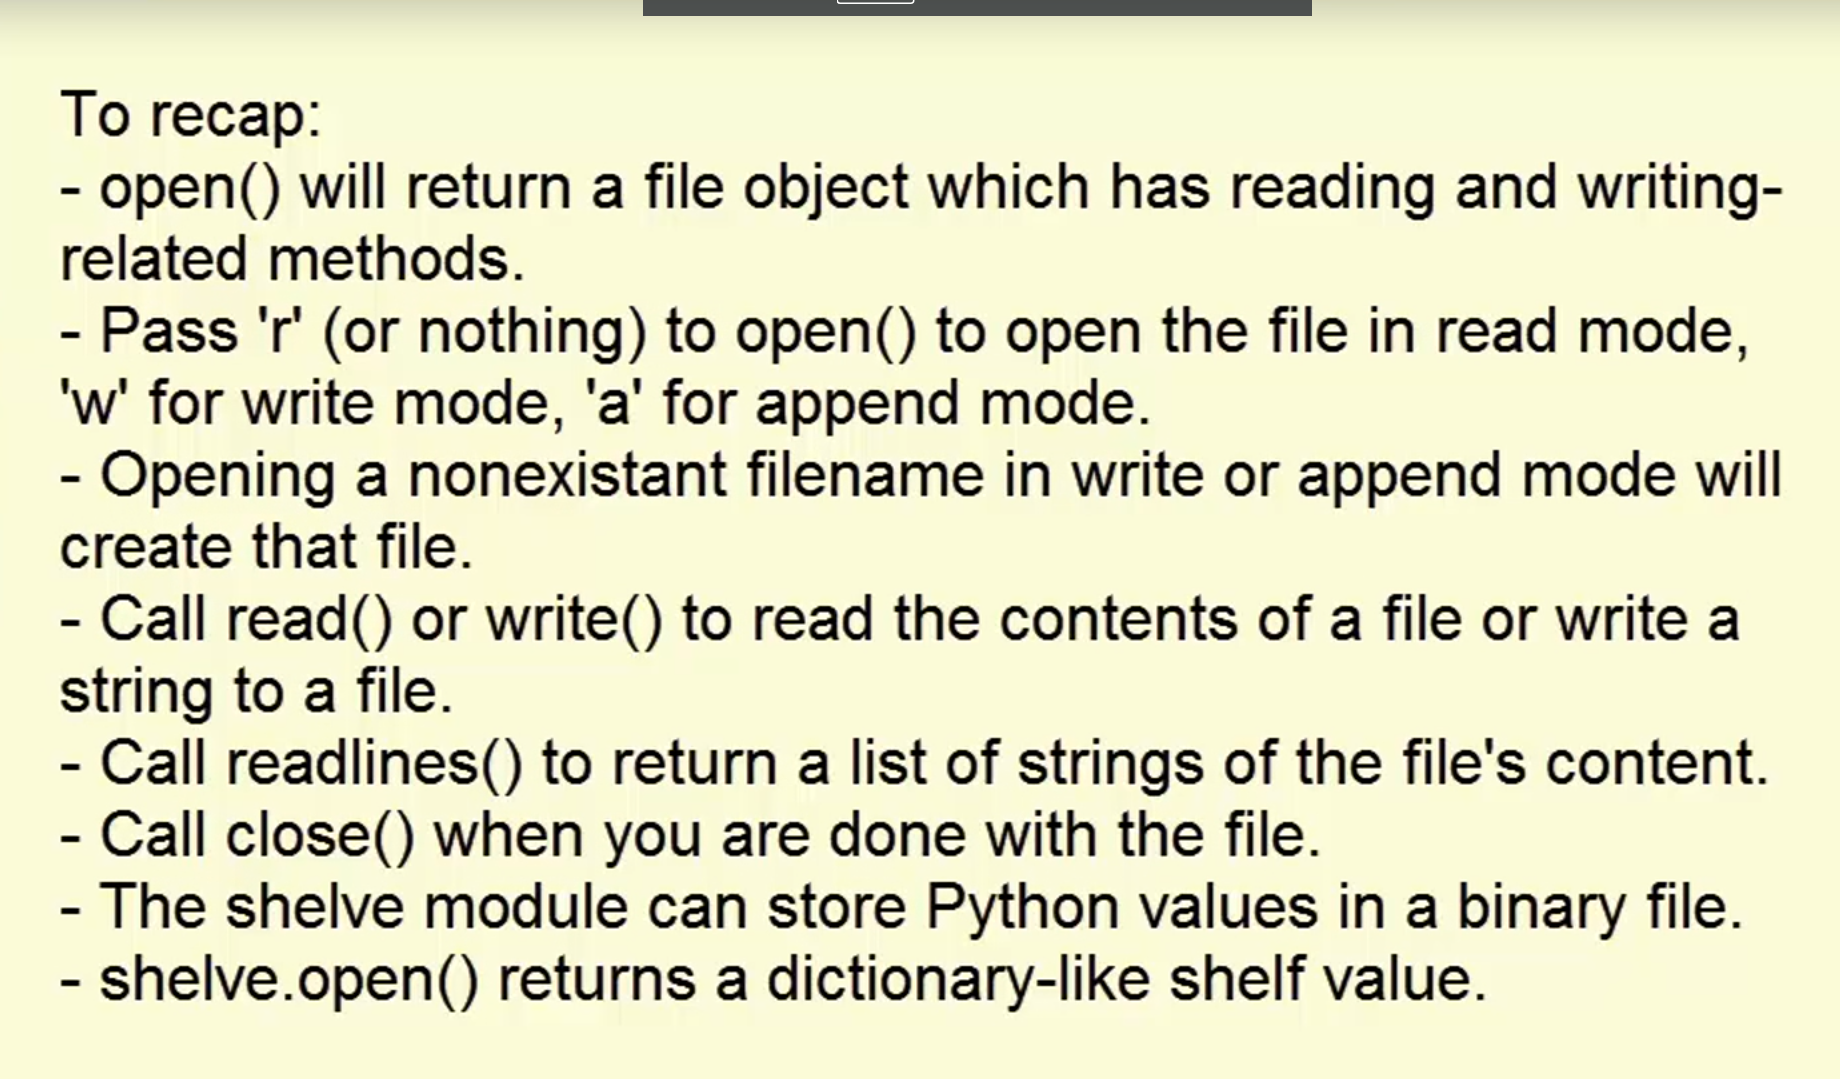

---

## Lesson 32: Copying and Moving files and folders

In [76]:
import shutil

In [77]:
os.getcwd()

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

### shutil.copy()

In [87]:
shutil.copy(r"mydata.dat", r"mydata2.dat")

'mydata2.dat'

### shutil.copytree()

For folders

In [83]:
shutil.copytree("mydata", "mydata_backup")

'mydata_backup'

### shutil.move()

In [88]:
# shutil.move(r"mydata2.dat", r"c:\thomas\ml")
shutil.move(r"mydata2.dat", r".\mydata_backup")

'.\\mydata_backup\\mydata2.dat'

move is also used for renaming files: no method for renaming

In [89]:
shutil.copy(r"mydata.dat", r"mydata2.dat")
shutil.move(r"mydata2.dat", r"mydata3.dat")

'mydata3.dat'

### RECAP

shutil functions:
* copy: copy files
* copytree: copy folders
* move: move or rename files

---

## Lesson 33: Deleting Files

In [92]:
food = open('food.txt', 'w')
food.close()

### os.unlink()

for deleting files

In [104]:
food = open('food.txt', 'w')
food.close()

In [105]:
os.unlink("food.txt")

Folders
* os.rmdir(): only works if folder is empty
* shutil.rmtree(): works if the folder is not empty:  
will also delete all the files inside

### os.rmdir()

In [96]:
os.mkdir("test")

In [97]:
os.rmdir("test")

### shutil.rmtree()

In [100]:
food = open('test\\food.txt', 'w')
food.close()

In [103]:
shutil.rmtree("test")

### send2trash module

* Doesn't delete files PERMANENTLY 
* puts them in the bin instead!

In [106]:
!pip install send2trash

In [107]:
import send2trash

In [108]:
food = open('food.txt', 'w')
food.close()

In [109]:
send2trash.send2trash("food.txt")

### RECAP

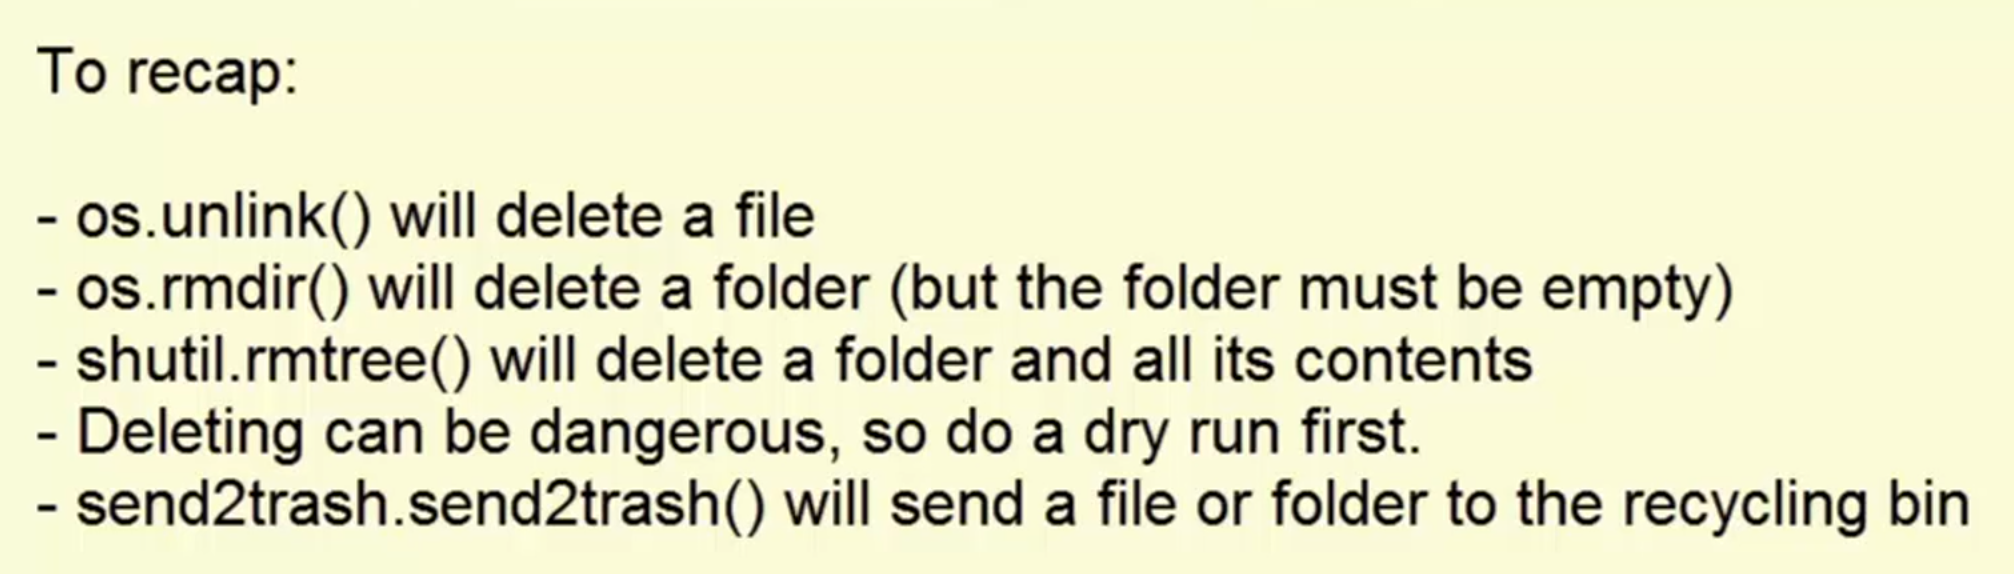

---

## Lesson 34: Walking Directory Tree

In [110]:
os.getcwd()

'C:\\Thomas\\ML\\automate-the-boring-stuff-python'

os.walk() will iterate over:
* every subfolder of the folder
* each of their subfolder
* each of their subfolders
* ...

In [115]:
for foldername, subfolders, filenames in os.walk(r"."):
    print("The folder is {}".format(foldername))
    print("The subfolders are: {}".format(str(subfolders)))
    # print("The files are: {}".format(str(filenames)))
    print()

The folder is .
The subfolders are: ['.git', '.ipynb_checkpoints', 'images', 'mydata', 'mydata_backup']

The folder is .\.git
The subfolders are: ['hooks', 'info', 'logs', 'objects', 'refs']

The folder is .\.git\hooks
The subfolders are: []

The folder is .\.git\info
The subfolders are: []

The folder is .\.git\logs
The subfolders are: ['refs']

The folder is .\.git\logs\refs
The subfolders are: ['heads', 'remotes']

The folder is .\.git\logs\refs\heads
The subfolders are: []

The folder is .\.git\logs\refs\remotes
The subfolders are: ['origin']

The folder is .\.git\logs\refs\remotes\origin
The subfolders are: []

The folder is .\.git\objects
The subfolders are: ['0f', '24', '26', '2a', '2f', '30', '34', '3f', '4c', '56', '58', '5d', '6e', '73', '89', '8e', 'c2', 'c8', 'c9', 'cb', 'e0', 'e5', 'e6', 'e7', 'ec', 'fb', 'info', 'pack']

The folder is .\.git\objects\0f
The subfolders are: []

The folder is .\.git\objects\24
The subfolders are: []

The folder is .\.git\objects\26
The subfo

We can also delete, or rename the subfolders in the above for-loop if necessary